##### Implementation of Algorithm for finding largest inscribed rectangle in polygon

In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt

##### Helper functionality: 

In [105]:
def counter_clockwise(vertices):
    """
    given a set of vertices v_1, ... v_4 in R_2 as python lists:
    returns the set of vertices ordered counter-clockwise.
    """
    #First center the set of points:
    mX, mY = 0,0
    for x,y in vertices:
        mX += (x / 4)
        mY += (y / 4)
    
    for x,y in vertices:
        x -= mX
        y -= mY
    
    #Then compute their angles
    for vertex in vertices:
        x,y = vertex
        angle = math.degrees(math.atan2(y,x))
        angle = angle if angle >= 0 else -angle + 180
        vertex.append(angle)
    
    #sort based off of the angles
    vertices.sort(reverse=True, key=lambda tup: tup[2])
    
    #remove the angle measurement and decenter points
    for val in vertices:
        val.pop()
        x,y = val
        x += mX
        y += mY
        
    return vertices

def edges(vertices):
    """
    given a set of four vertices v_1, ..., v_4
    returns v_1,v_2 - v_2,v_3 - ... v_4,v_1
    """
    edges = []
    for i in range(4):
        p1, p2 = vertices[i % 4], vertices[(i + 1) % 4]
        edges.append([p1,p2])
    return edges

In [106]:
points = [[1,0],[1,2],[0,3],[0,4]]

In [107]:
e = edges(counter_clockwise(points))
e

[[[0, 3], [0, 4]], [[0, 4], [1, 2]], [[1, 2], [1, 0]], [[1, 0], [0, 3]]]

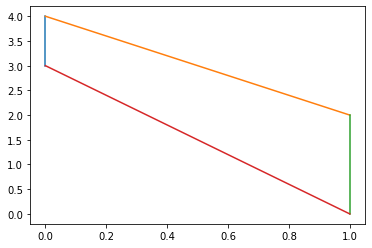

In [108]:
for edge in e:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

#### Algorithm 1: Examining the type of edges in a polygon 

In [117]:
def edge_types(vertices):
    """
    args: vertices v_1,...,v_4
    returns a dictionary mapping edges to edge types based of vertices
    """
    polygon_edges = edges(counter_clockwise(vertices))
    
    edge_types = dict()
    for edge in polygon_edges:
        x_start, x_end = edge[0][0], edge[1][0]
        y_start, y_end = edge[0][1], edge[1][1]
        e  = (tuple(edge[0]), tuple(edge[1]))
        if (x_start < x_end and y_end > y_start):
            edge_types[e] = 1
        elif (x_start > x_end and y_end > y_start):
            edge_types[e] = 2
        elif (x_start > x_end and y_end < y_start):
            edge_types[e] = 3
        elif (x_start < x_end and y_end < y_start):
            edge_types[e] = 4
        elif (x_start == x_end and y_end > y_start):
            edge_types[e] = 5
        elif (x_start > x_end and y_end == y_start):
            edge_types[e] = 6
        elif (x_start == x_end and y_end < y_start):
            edge_types[e] = 7
        else:
            if (x_start < x_end and y_end == y_start):
                edge_types[e] = 8
            else:
                raise ValueError("Invalid set of vertices given")
    return edge_types
    

In [118]:
types = edge_types(points)

In [119]:
types

{((0, 3), (0, 4)): 5,
 ((0, 4), (1, 2)): 4,
 ((1, 2), (1, 0)): 7,
 ((1, 0), (0, 3)): 2}